# Project: Investigate a Dataset - [tmdb Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

The movie dataset was collected from **The movie Database** (TMDb) and contains over 10,000 data points of information on movies. These data points include but are not limited to movie popularity rating, production companies, revenues, runtime, original title.

This study seeks to answer four (4) important questions bugging the mind of most movie lovers.

1. Research Question 1:¶

*Which genre of movies is most popular from year to year?*

2. Research Question 2:¶

*Which production company made the highest profits from movies produced?*

3. Research Question 3:

*Which production company is rated the most popular on tmdb?*

4. Research Question 4:¶

*What effect does the runtime of a movie have on its adjusted revenue and popularity?*

In [1]:
# First we have to import packages neccesary for four analysis, this include pandas, numpy, seaborn etc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Data Wrangling
Now lets work on our data.

In [2]:
# loading our data as pd and viewing the first five rows to have a view of our data
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# getting more information about the movie dataset
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#let's describe our data to gain more insight
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


This movie information was gathered for films that were released between the years of 1960 and 2015 as described in the above table. The most popular movie had a popularity index of 32.98, the longest runtime in minutes for movies is 900, and the movoe that had the most votes from viewers is 9767. The movie with the highest adjusted revenue and profit had 2,827,124,000 and $2,750,137,000, respectively.

We can also see that there are films with no runtime, no revenue, and no profit. It should be noted that these data were either accounted for or maybe not provided.

Lets plot our data and get an overview of the data visual

## Data Cleaning¶
First data cleaning process will be to remove the properties that are not relevant to our study objectives. After that we deal with duplicates(if any) and missing values.

In [5]:
# features such as "imbd_id", "original_title", "homepage", 
#"tagline", "budget", "revenue" will be droped as we shall be using only the _adj values of both

movie_data = movie_data.drop(["imdb_id", "original_title", "homepage","tagline", "keywords","overview", "budget","revenue",], axis=1)

#view the new dataset new_df
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   release_date          10866 non-null  object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
 11  budget_adj            10866 non-null  float64
 12  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [6]:
#checking columns to be sure all columns identified above were dropped
movie_data.columns

Index(['id', 'popularity', 'cast', 'director', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

We have some missing value recorded in the genre feature. It is also noticed that the dataset now has 12 colunms after dropping 9 features that would not be used in the study.

In [7]:
#checking for duplicate values
movie_data.duplicated().sum()

1

We have 1 duplicate value in our study

In [8]:
# veiwing the duplicate value

movie_data[movie_data.duplicated()]

,id,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#drop the duplicated value

movie_data.drop_duplicates(inplace=True)

In [10]:
#To confirm that the opretion was successful, lets check the data for duplicates again
movie_data.duplicated().sum()

0

There are Zero (0) duplicates present in our movie_data dataset.

Lets check for missing values

In [11]:
#Checking for missing values (NaN)
movie_data.isnull().sum()

id                         0
popularity                 0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The study shows that we have 76 missing values for the cast, 44 for director and 23 for genre, and 1,030 for production_companies. We'll need to convert these missing values to unknown

In [12]:
#replace missing vaues with "unknown" and check again for missing values

movie_data.fillna("unknown", inplace=True)
movie_data.isnull().sum()


id                      0
popularity              0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

The replacement was successfull and we no longer have null values (NaN) in our study. For the next step, we'll create a column called profit which we can get by subtracting budgets_adj from revenues_adj

In [13]:
#creating profit column
movie_data['profit'] = movie_data['revenue_adj'] - movie_data['budget_adj']

movie_data.head()

,id,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


profit has been added as the last column in our table

# Exploratory Data Analysis
It's time to explore the insights from our data

### Research Question 1
*What genre of movie is rated the most popular?*

In [14]:
#splitting the genres by the delimiter (|) and checking the first few rows to see the outcome of our split
genres_movie = movie_data.assign(genres=movie_data.genres.str.split('|')).explode('genres')
genres_movie.head()

,id,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


We have successfully split the genres differently. Let's now get insight from our genre column.

In [15]:
#Grouping a data called genres_pop where pop == popularity and profit.
genres_pop = genres_movie.groupby(['genres'],as_index=False)['popularity', 'profit'].mean()
#viewing our data in the new table 
genres_pop.head()

/var/folders/xq/jwh3l72933581l2byh28hl2c0000gn/T/ipykernel_17017/1242460853.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genres_pop = genres_movie.groupby(['genres'],as_index=False)['popularity', 'profit'].mean()


,genres,popularity,profit
0,Action,0.926274,5.879816e+07
1,Adventure,1.154259,9.773789e+07
2,Animation,0.852182,5.996078e+07
3,Comedy,0.592607,3.197669e+07
4,Crime,0.744930,3.510290e+07


In [16]:
#Top 20 genre by popularity index
genres_pop.sort_values(by=['popularity'], ascending = False).head(20)

,genres,popularity,profit
1,Adventure,1.154259,9.773789e+07
15,Science Fiction,1.001548,5.745413e+07
8,Fantasy,0.992840,7.380484e+07
0,Action,0.926274,5.879816e+07
2,Animation,0.852182,5.996078e+07
7,Family,0.786668,6.081282e+07
4,Crime,0.744930,3.510290e+07
17,Thriller,0.741563,3.460314e+07
18,War,0.727683,4.105605e+07
13,Mystery,0.690012,3.140699e+07


From the table above, we can tell that the most popular genre of movie in our dataset is Adventure closely followed by Science Fiction.

In [17]:
#Defining a function for our genres plot
def genreT15(value1,value2,order):
    result1=genres_pop.sort_values(value1, ascending = order).head(15)
    pl=sns.lineplot(y=value2,x=value1,data=result1)
    title=plt.title ("Top 5 tmdb Movie Genres {}".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result1,pl,title,yl,xl

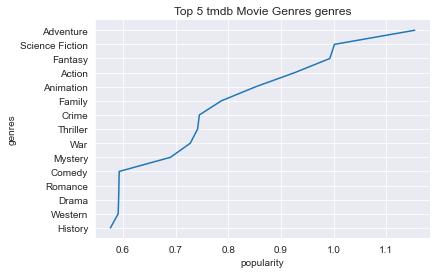

In [18]:
#plot for top 15 movie genres by popularity index
genreT15('popularity', 'genres', False)
sns.despine()
plt.show()

Adventure movies have the highest popularity index.

### Research Question 2
*Which production company has a higher popularity rating?*

In [19]:
# First step will be to describe our cleaned data to understand better what lies in the data
movie_data.describe()


,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


This movie information was gathered for films that were released between the years of 1960 and 2015 as described in the above table. The most popular movie had a popularity index of 32.98, the longest runtime in minutes for movies is 900, and the movoe that had the most votes from viewers is 9767. The movie with the highest adjusted revenue and profit had 2,827,124,000 and $2,750,137,000, respectively.
We can also see that there are films with no runtime, no revenue, and no profit. It should be noted that these data were either accounted for or maybe not provided.

Lets plot our data and get an overview of the data visual

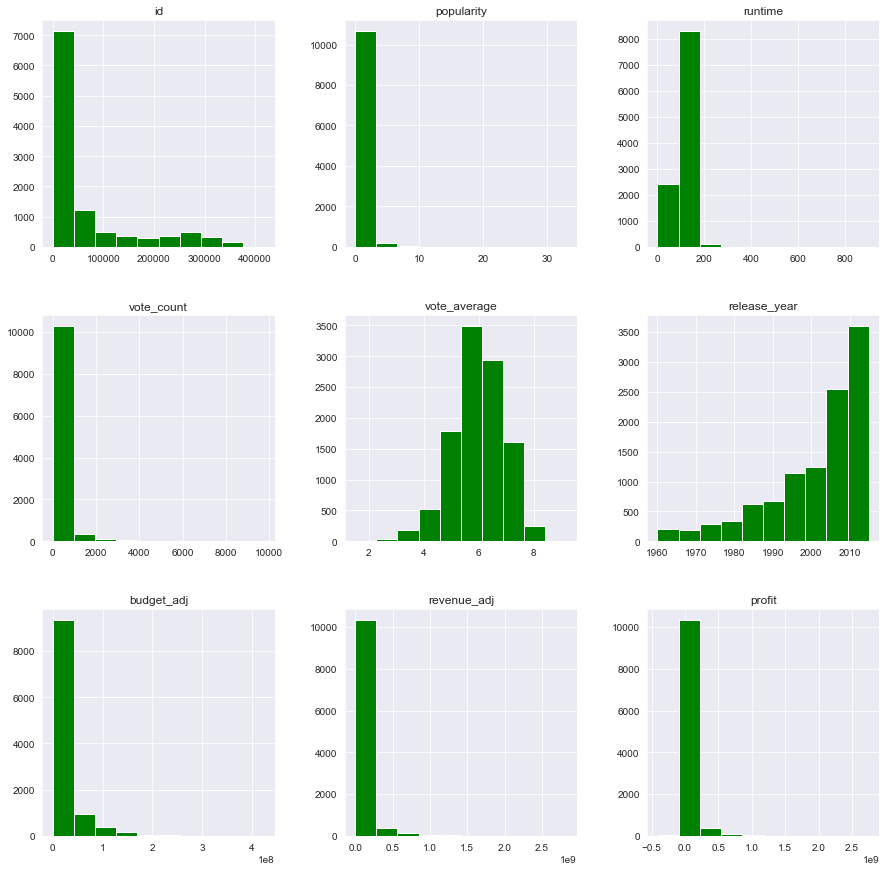

In [20]:
movie_data.hist(figsize=(15,15), grid=True, color="green");


From the scatter plot above it is evident that as profit increases adjusted revenue increases as well. This is a great corelations between the two variables.

Let's answer our research question. Note that the production_companies column has more than one name seperated by a delimiter "|". We'll need to explode this column so we have only one name appearing in this column. 



In [21]:
#Let's call a new varable name for production_companies data, split the production companies by | and then show some only the first five rows.

pr_com = movie_data.assign(production_companies=movie_data.production_companies.str.split('|')).explode('production_companies')
pr_com.head()

,id,popularity,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Amblin Entertainment,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Legendary Pictures,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Fuji Television Network,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Dentsu,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


We can get insight on each dataset since each production company now has it's own row.

In [22]:
#Group a data called pr_com_pop where pop == popularity and profit. After this, we will view the data.
pr_com_pop=pr_com.groupby(['production_companies'],as_index=False)['popularity', 'profit'].mean()
pr_com_pop.head()

/var/folders/xq/jwh3l72933581l2byh28hl2c0000gn/T/ipykernel_17017/1834678644.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pr_com_pop=pr_com.groupby(['production_companies'],as_index=False)['popularity', 'profit'].mean()


,production_companies,popularity,profit
0,"""DIA"" Productions GmbH & Co. KG",1.626534,9.898792e+06
1,# Lexyn Productions,0.468552,0.000000e+00
2,10 West Studios,0.245948,0.000000e+00
3,100 Feet Productions,0.595424,-1.012787e+07
4,1019 Entertainment,0.336107,7.373870e+05


In [23]:
#Sort the production companies by popularity for top 5
pr_com_pop.sort_values(by=['popularity'], ascending = False).head(5)

,production_companies,popularity,profit
1125,Bulletproof Cupid,14.311205,5.557057e+08
2789,Fuji Television Network,12.777401,4.952746e+08
1906,DefyNite Films,11.422751,5.410479e+07
7241,Truenorth Productions,11.173104,1.718723e+09
62,3Foot7,10.174599,6.494795e+08


From the above table, we can tell that the most popular production company is Bulletproof Cupid.

In [24]:
#sort production_companies by popularity by the last 5
pr_com_pop.sort_values(by=['popularity'], ascending = False).tail(5)

,production_companies,popularity,profit
5908,Rise Films,0.001372,0.0
5331,Parting Shots Media,0.000620,0.0
4138,Logolite Entertainment,0.000620,0.0
6154,School Pictures,0.000620,0.0
6365,Simcha Productions,0.000188,0.0


The table reveals that Simcha Productions is the least popular production company whose movies are on tmdb.

In [25]:
#Defining a function for the plot
def procomt5(value1,value2,order):
    result=pr_com_pop.sort_values(value1, ascending = order).head()
    pl=sns.scatterplot(y=value2,x=value1,data=result)
    title=plt.title ("Top 5 {} on tmdb".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result,pl,title,yl,xl

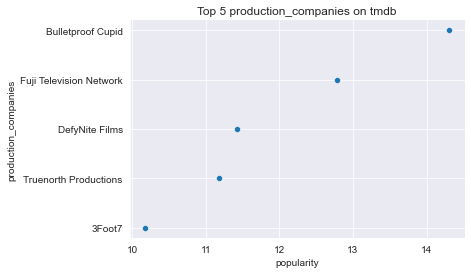

In [26]:
#plotting the graph for top 5 production companies by popularity
procomt5('popularity','production_companies', False)
sns.despine()
plt.show()

Similar to the most popular production company table, this plot shows the visualisation for it. The plot makes it easier to read the difference at a glance. Bulletproof Cupid is seen to be more popular than the second most popular production company by more than 200%.

## Research Question 3
*Which movie production company made the highest profits from movies produced?*

In [27]:
#sort production_companies by profit for the top 5
pr_com_pop.sort_values(by=['profit'], ascending = False).head()

,production_companies,popularity,profit
3292,Hoya Productions,2.010733,2.128036e+09
7241,Truenorth Productions,11.173104,1.718723e+09
273,Alfran Productions,5.738034,1.246626e+09
3692,Julia Phillips and Michael Phillips Productions,1.104816,1.021009e+09
4264,MIRACLE Productions GmbH & Co. KG,6.012584,9.415495e+08


Hoya Productions made the most profit even though Bulletproof Cupid was the most popular production company. This shows that profit from a movie is not dependent on the popularity of the production company.

In [28]:
#sort production companies by profit for those who made the least profit
pr_com_pop.sort_values(by=['profit'], ascending = False).tail()

,production_companies,popularity,profit
2075,DreamWorks Television,0.757082,-1.200000e+08
6904,Thalia AG,0.533292,-1.209243e+08
931,Blind Wink Productions,1.214510,-1.551102e+08
6342,Silver Bullet Productions (II),1.214510,-1.551102e+08
1003,Boram Entertainment Inc.,0.250540,-4.139124e+08


From the above table, we can tell that Boram Entertainment Inc made no profits from the movies they produced. They rather made a loss of $413,912,400

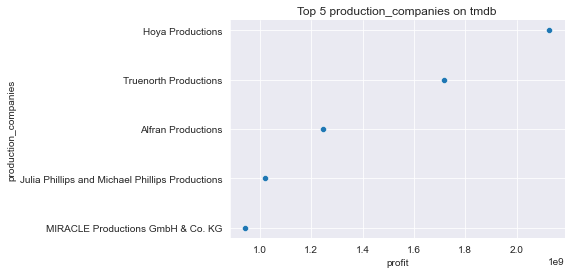

In [29]:
#plotting Top 5 production companies by profit generated
procomt5('profit','production_companies', False)
sns.despine()
plt.show()

We can conclude that the popularity of a brand is not a determinant of their profit from movies produced. From the top 5 production companies by popularity table, only Truenorth made it to the list of top 5 production companies by profits in the plot above.

## Research Question 4
*What effect does the runtime of a movie have on revenue_adj and popularity?*

Let's explore the data in this section using scatter plot

In [30]:
#Define a function to plot the runtime data for revenue_adj and profit
def runtime_top5(value1,value2,order):
    result=movie_data
    pl=sns.scatterplot(y=value2,x=value1,data=result, color="blue", ec="black")
    title=plt.title ("Top 5 tmdb revenue_adj by Runtime".format(value2))
    yl=plt.ylabel("{}".format(value2))
    xl=plt.xlabel("{}".format(value1))
    return result,pl,title,yl,xl

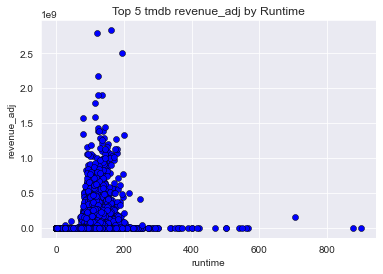

In [31]:
#Movie runtime by revenue_adj
runtime_top5("runtime","revenue_adj", False)
plt.show()

We can make out a sizable cluster of points located between 150 and 200 runtime minutes. However, a number of movies with this plot appear to have made no revenues because they fall into the zero profit range. We encourage the pertinent stakeholders to input the movie data for revenues and budgets that were previously nil because this is our research's drawback (0).

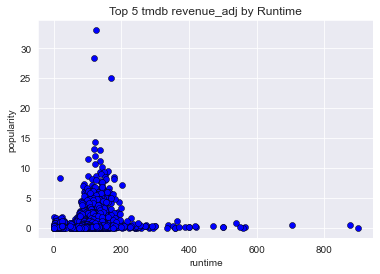

In [32]:
#Movie runtime by popularity
runtime_top5("runtime","popularity", False)
plt.show()

So many points are clustered around the 150 - 200 runtime minutes which suggests that movies whose runtime fall within this range are more popular than others.

# Conclusions

The most popular movie genre among viewers who watch movies on tmdb is Adventure with a popularity index of  while the second most watched moved genre is Science Fiction.

Bulletproof Production company is most popular among movie viewers with a popularity index of 14.311205 followed by Fuji Television Network with an idndex of 12.777401. This is not to say that they made the highest revenue on tmdb from the movies they produced.

DreamWorks Television production company made the highest profits (USD 2,128,036,000) from movies produced even though they were not among the top five (5) most popular production companies. This was closely followed by Thalia AG who made a profit of USD 1,718,723,000. This tells us that the popularity of a production company does not determine how much they make in profits from the sale of their movies.

Viewers are more likely to watch popular movies that are not longer than 150 to 200 minutes than others. Also, movies with runtime between 150 to 200 minutes made the most revenues after adjusting for inflation.

## Limitation
Let's bear it in mind that we some movies in the datasethad runtimes of zero (0) minutes. This also applies to budgets and revenues. An attempt to remove the zero (0) values reduced the data by more than have leaving very little data for the analysis, and so the zero (0) values were retained in this analysis.